In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import boxcox, yeojohnson
import numpy as np


In [2]:

data = pd.read_csv("../data/raw.csv")
df_ml = data.copy()
df_pb = data.copy()

data.head()

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


INFORMACION DE LA BASE DE DATOS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4284 non-null   object 
 1   Is_Product_Details_viewed  4284 non-null   object 
 2   Session_Activity_Count     4284 non-null   int64  
 3   No_Items_Added_InCart      4275 non-null   float64
 4   No_Items_Removed_FromCart  4284 non-null   int64  
 5   No_Cart_Viewed             4275 non-null   float64
 6   No_Checkout_Confirmed      4284 non-null   int64  
 7   No_Checkout_Initiated      4284 non-null   int64  
 8   No_Cart_Items_Viewed       4284 non-null   int64  
 9   No_Customer_Login          4284 non-null   int64  
 10  No_Page_Viewed             4284 non-null   int64  
 11  Customer_Segment_Type      4284 non-null   int64  
 12  Cart_Abandoned             4284 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage:

TRATAMIENTO DE DATOS

TRANSFORMAMOS LA VARIABLE ID

In [4]:
data = data.drop("ID", axis=1)
data.index = [i for i in range(1, len(data)+1)]

In [5]:
data.head()

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
1,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
2,No,38,0.0,0,2.0,0,0,2,0,2,0,1
3,No,8,5.0,0,0.0,1,1,1,0,0,1,0
4,No,6,0.0,0,2.0,0,0,4,0,0,0,1
5,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [6]:

cat = data[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]]

num = data.drop(columns=["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"])


VARIABLES CATEGORICAS

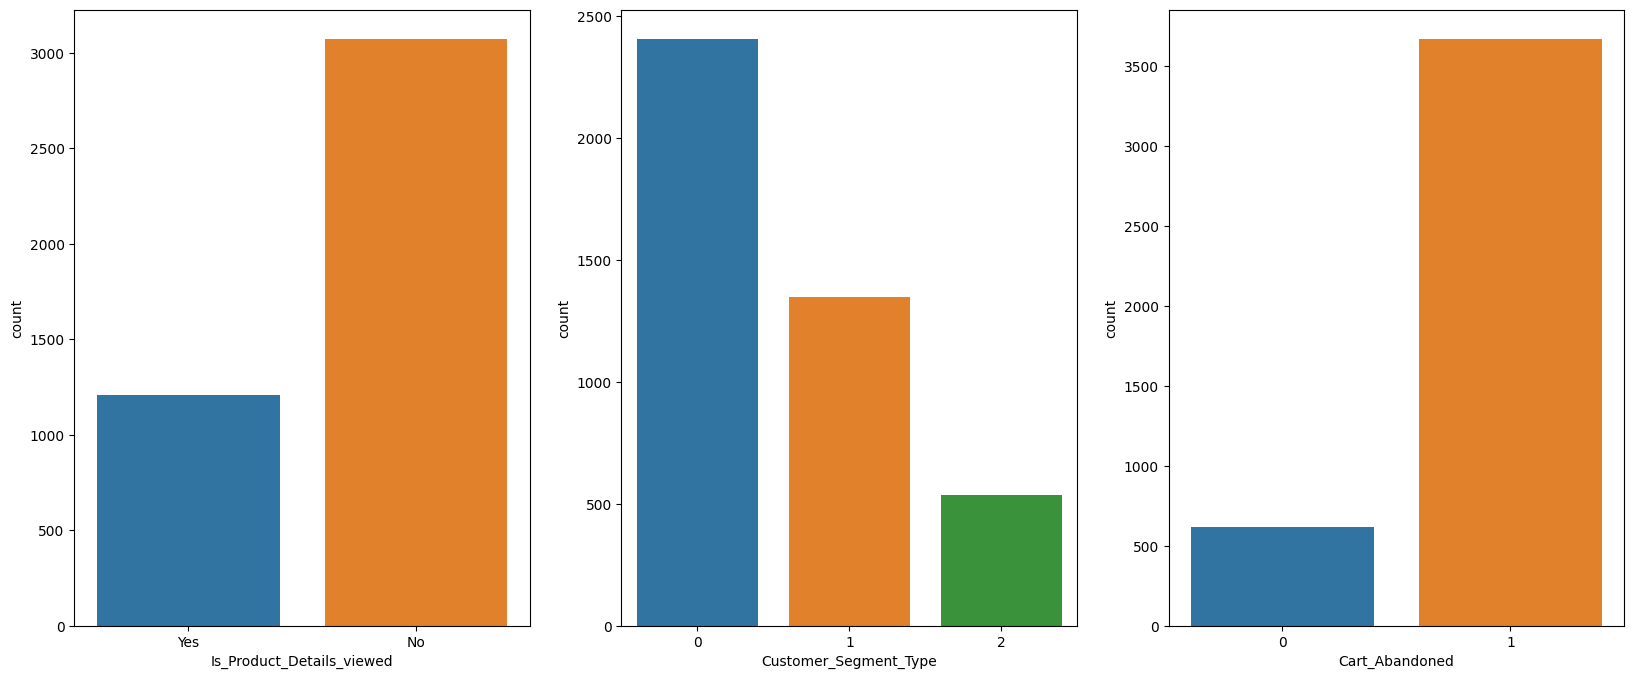

In [7]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

VARIABLES NUMERICAS

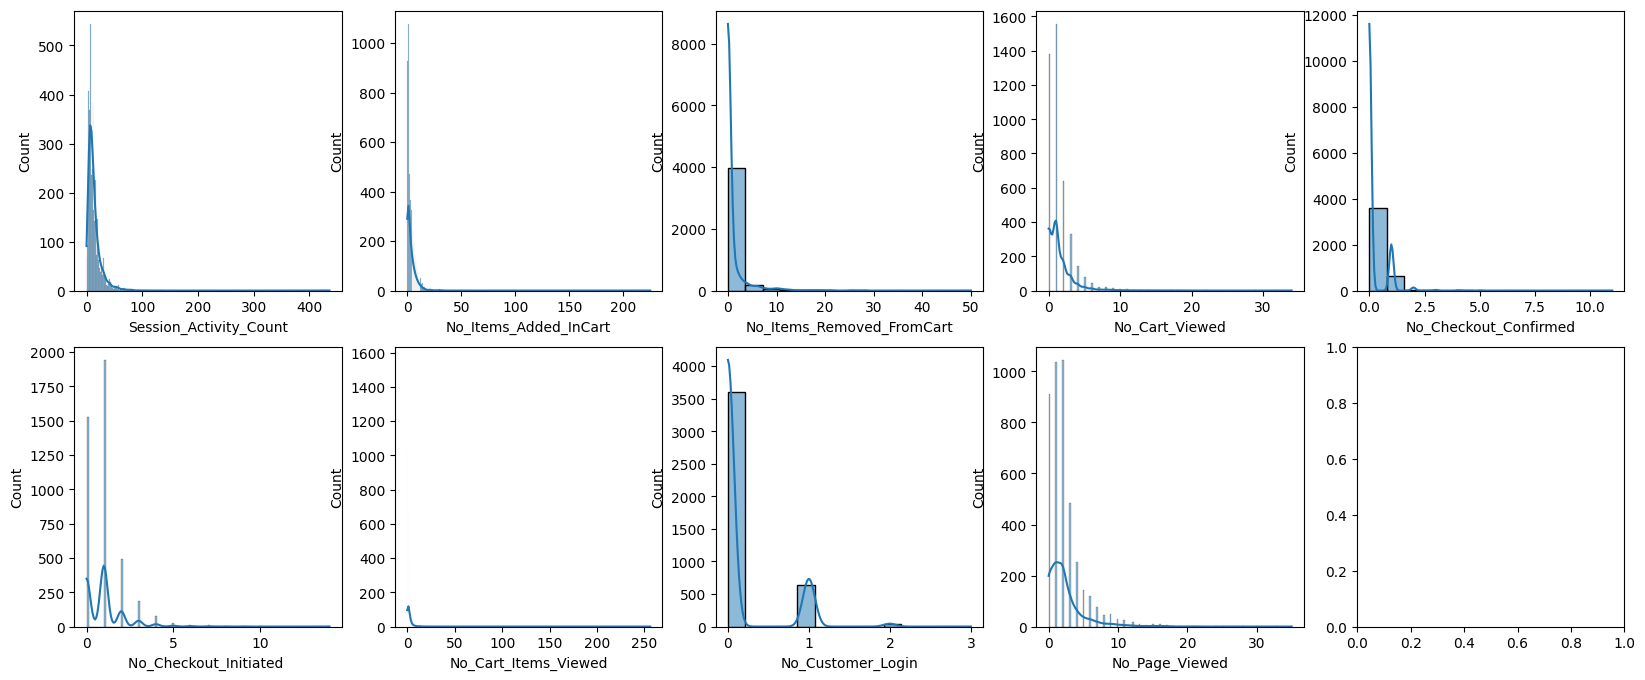

In [8]:
f, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for column, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.histplot(num[column], kde=True, ax=subplot)

VARIABLES NUMERICAS Vs CART_ABANDONED


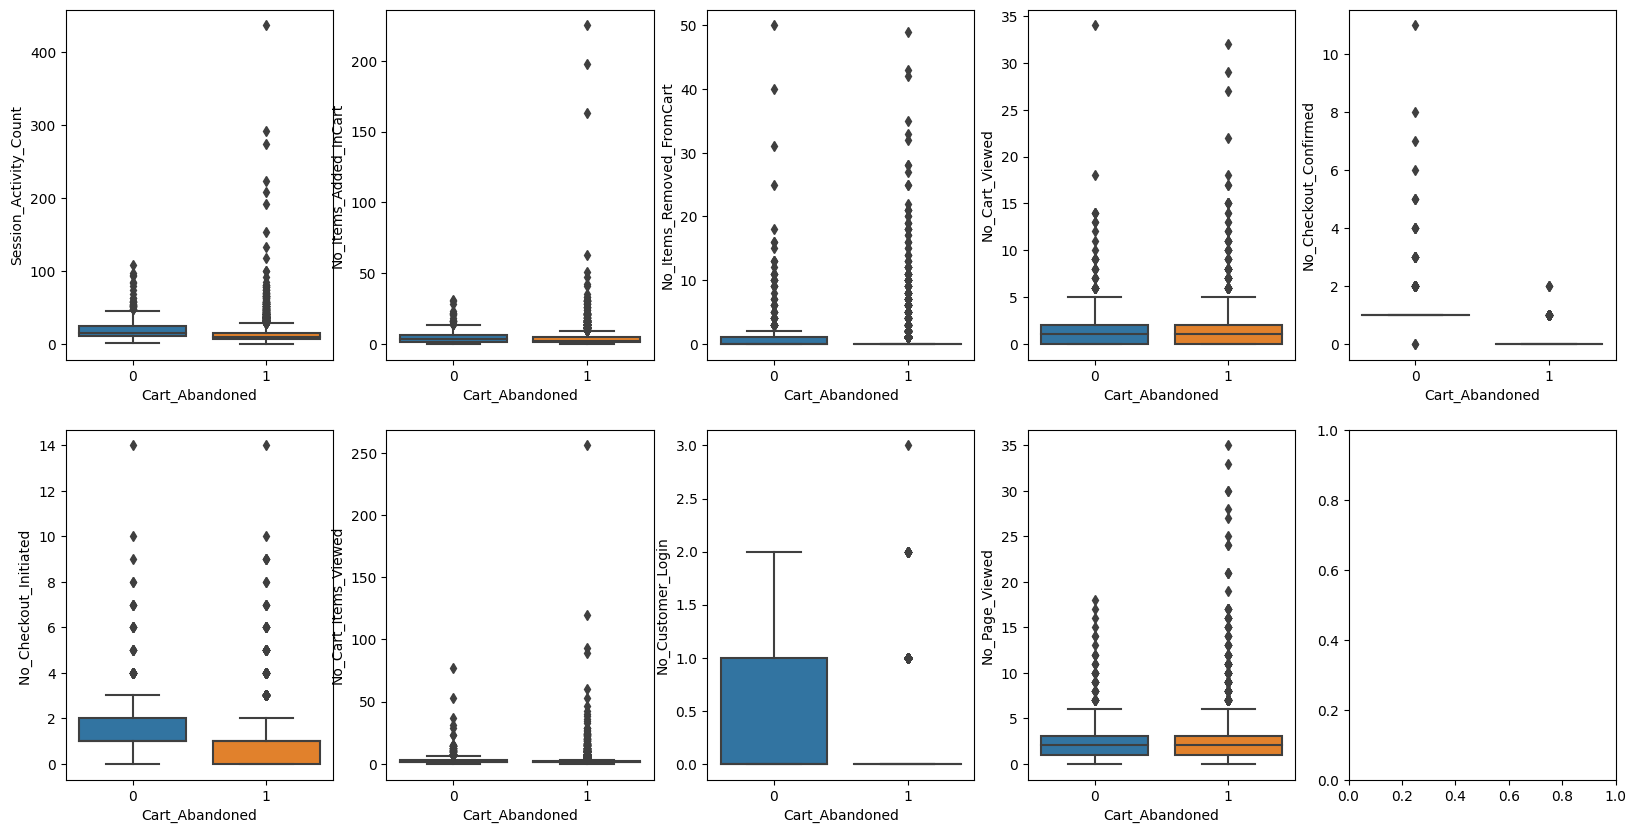

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.boxplot(x=cat["Cart_Abandoned"], y=num[var], ax=subplot)

In [10]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4284 entries, 1 to 4284
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Session_Activity_Count     4284 non-null   int64  
 1   No_Items_Added_InCart      4275 non-null   float64
 2   No_Items_Removed_FromCart  4284 non-null   int64  
 3   No_Cart_Viewed             4275 non-null   float64
 4   No_Checkout_Confirmed      4284 non-null   int64  
 5   No_Checkout_Initiated      4284 non-null   int64  
 6   No_Cart_Items_Viewed       4284 non-null   int64  
 7   No_Customer_Login          4284 non-null   int64  
 8   No_Page_Viewed             4284 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 334.7 KB


Is_Product_Details_viewed Vs Cart_Abandoned


<Axes: xlabel='Is_Product_Details_viewed', ylabel='count'>

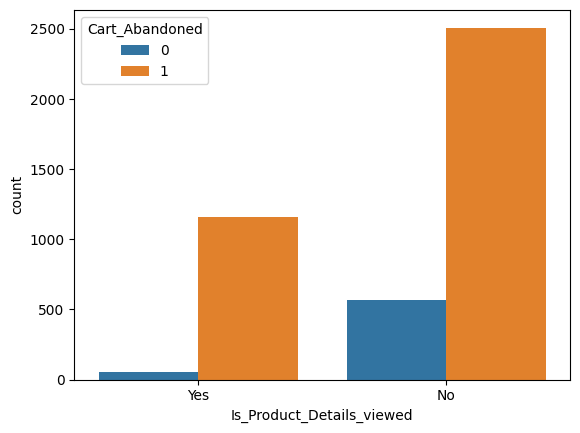

In [11]:
sns.countplot(x=data.Is_Product_Details_viewed,hue=data.Cart_Abandoned)

DIAGRAMA DE CORRELLACION

<Axes: >

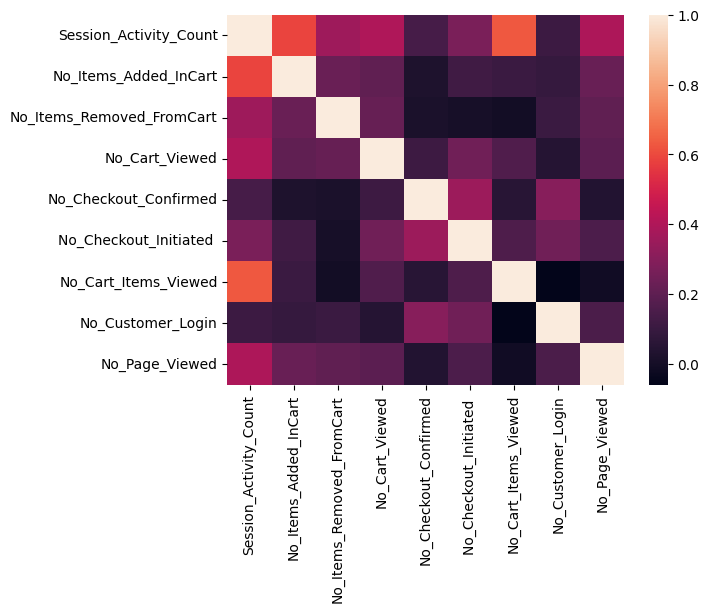

In [13]:
corr = num.corr()
sns.heatmap(corr)

PREPARACION DE DATOS

In [14]:
data.isna().sum()

Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

IMPUTANDO DATOS PERDIDOS

<Axes: ylabel='No_Items_Added_InCart'>

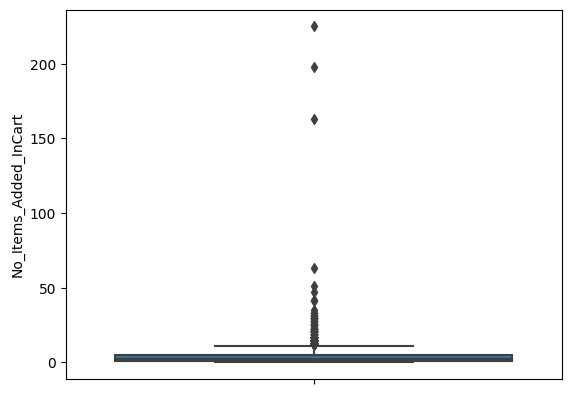

In [15]:
sns.boxplot(y=data["No_Items_Added_InCart"])


<Axes: ylabel='No_Cart_Viewed'>

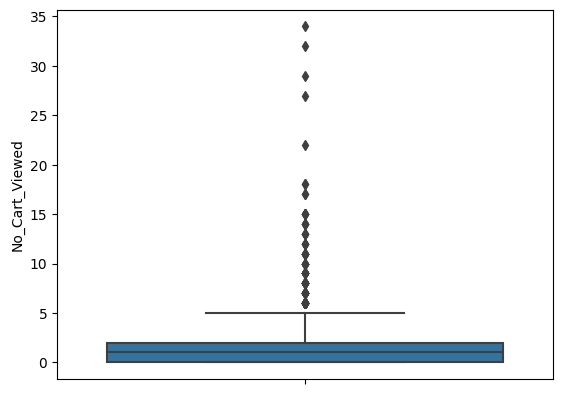

In [16]:
sns.boxplot(y=data["No_Cart_Viewed"])

DADOS OUTLIERS EN LAS COLUMNAS FALTANTES USAMOS LA MEDIANA COMO METODO DE REFERENCIA PARA COMPLETADO DE DATOS

In [17]:
data['No_Items_Added_InCart'] = data['No_Items_Added_InCart'].fillna(data['No_Items_Added_InCart'].median())

In [18]:
data['No_Cart_Viewed'] = data['No_Cart_Viewed'].fillna(data['No_Cart_Viewed'].median())

In [19]:
data.isna().sum()

Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [20]:
data['No_Cart_Viewed'] = data['No_Cart_Viewed'].astype('int64')
data['No_Items_Added_InCart'] = data['No_Items_Added_InCart'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4284 entries, 1 to 4284
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Is_Product_Details_viewed  4284 non-null   object
 1   Session_Activity_Count     4284 non-null   int64 
 2   No_Items_Added_InCart      4284 non-null   int64 
 3   No_Items_Removed_FromCart  4284 non-null   int64 
 4   No_Cart_Viewed             4284 non-null   int64 
 5   No_Checkout_Confirmed      4284 non-null   int64 
 6   No_Checkout_Initiated      4284 non-null   int64 
 7   No_Cart_Items_Viewed       4284 non-null   int64 
 8   No_Customer_Login          4284 non-null   int64 
 9   No_Page_Viewed             4284 non-null   int64 
 10  Customer_Segment_Type      4284 non-null   int64 
 11  Cart_Abandoned             4284 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 435.1+ KB


In [21]:

cat = data[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]]

num = data.drop(columns=["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"])
df_pb = data.copy()

ESCALAMOS LOS DATOS

In [22]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(num)
x_scaled

array([[0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.08715596, 0.        , 0.        , ..., 0.0078125 , 0.        ,
        0.05714286],
       [0.01834862, 0.02222222, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       ...,
       [0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.01834862, 0.01333333, 0.        , ..., 0.00390625, 0.        ,
        0.05714286],
       [0.07110092, 0.01777778, 0.        , ..., 0.02734375, 0.        ,
        0.02857143]])

In [23]:
df_scaled = pd.DataFrame(x_scaled,columns=num.columns)
df_scaled.head(3)

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,0.009174,0.004444,0.0,0.000000,0.000000,0.000000,0.003906,0.0,0.000000
1,0.087156,0.000000,0.0,0.058824,0.000000,0.000000,0.007812,0.0,0.057143
2,0.018349,0.022222,0.0,0.000000,0.090909,0.071429,0.003906,0.0,0.000000


array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

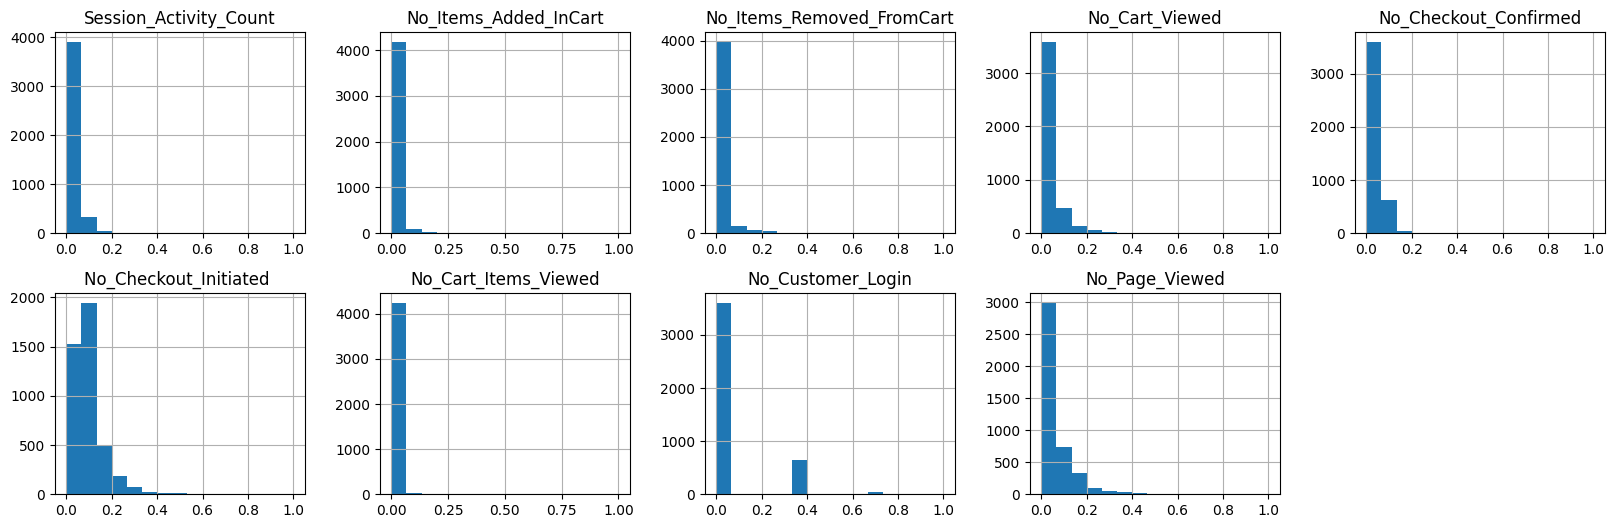

In [24]:
df_scaled.hist(bins=15, figsize=(20, 6), layout=(2, 5))

In [25]:
standard_scaler = StandardScaler()
df_normalize = pd.DataFrame(standard_scaler.fit_transform(df_scaled), columns=df_scaled.columns)

In [26]:
df_scaled_transformed = df_scaled.apply(lambda x: yeojohnson(x)[0])

# Aplicar la transformación Yeo-Johnson a df_num
df_num_transformed = num.apply(lambda x: yeojohnson(x)[0])

NORMALIZACION DE DATOS ESCALADOS

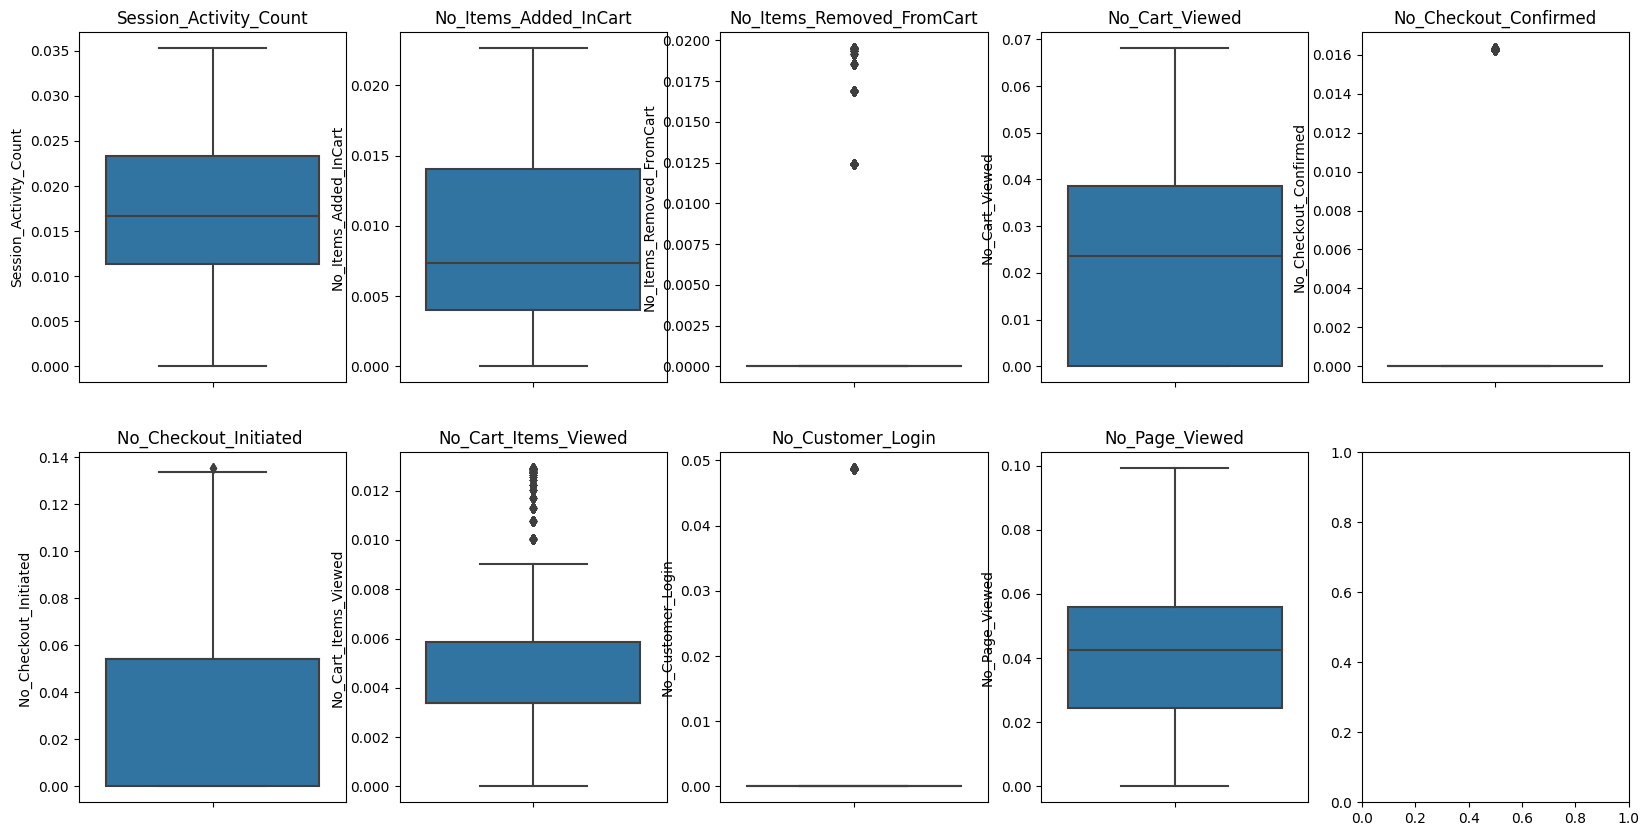

In [27]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_scaled_transformed.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_scaled_transformed[var], ax=subplot)
    subplot.set_title(var)

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

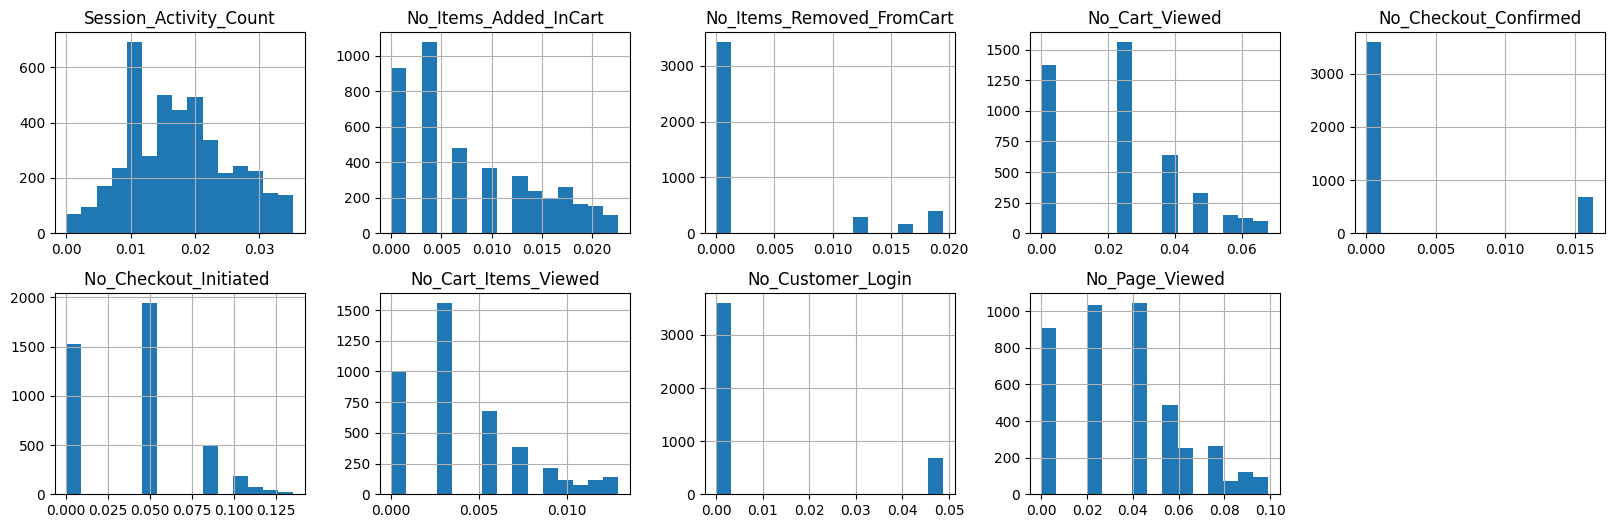

In [28]:
df_scaled_transformed.hist(bins=15, figsize=(20, 6), layout=(2, 5))

NORMALIZACION DE DATOS NO ESCALADOS

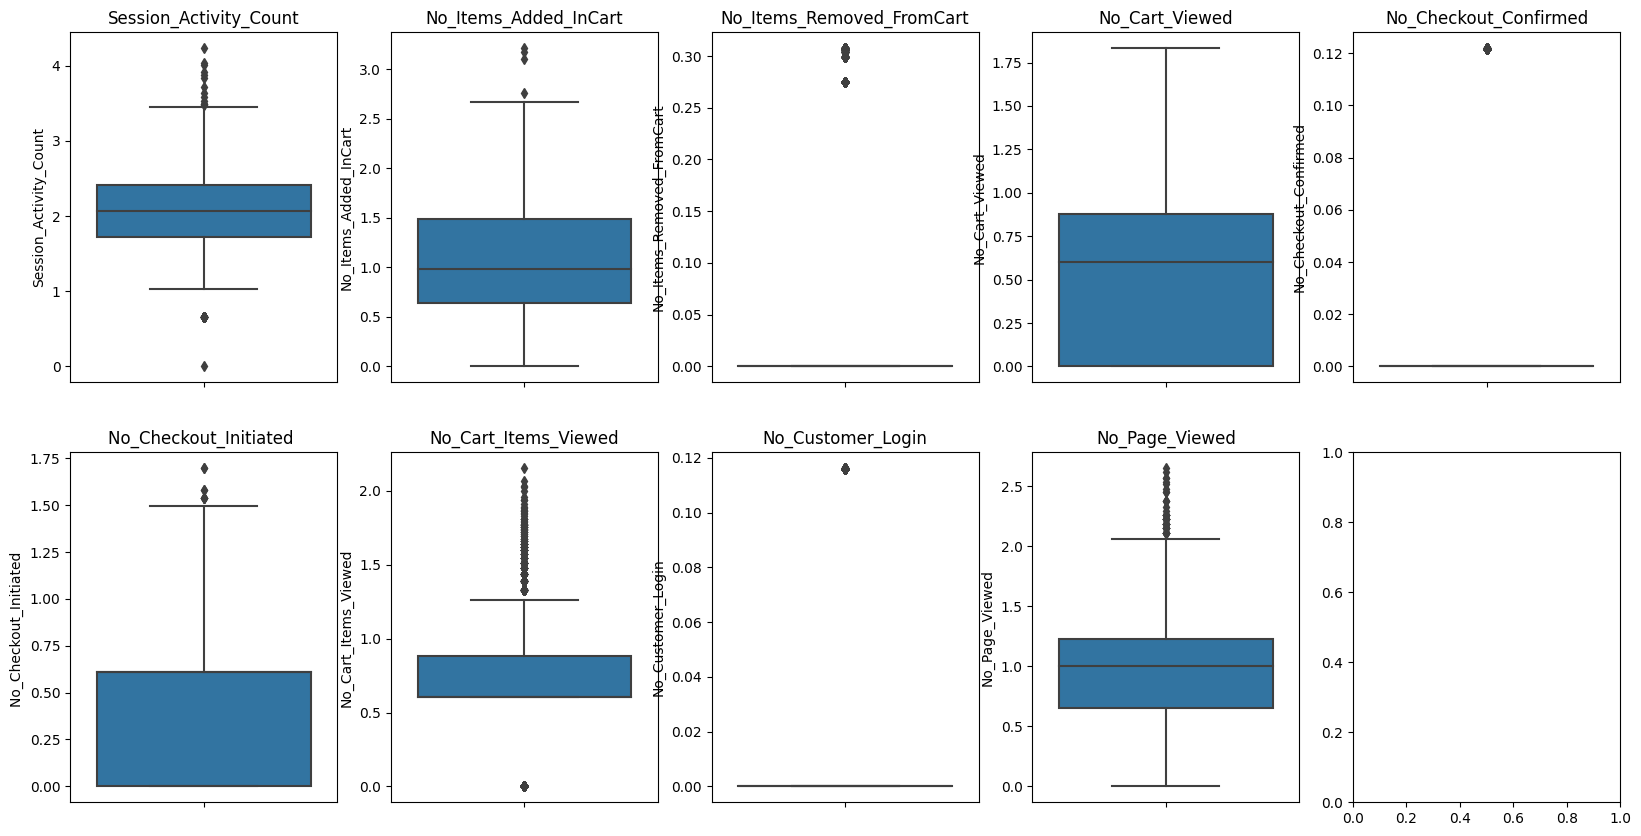

In [29]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_num_transformed.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_num_transformed[var], ax=subplot)
    subplot.set_title(var)

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

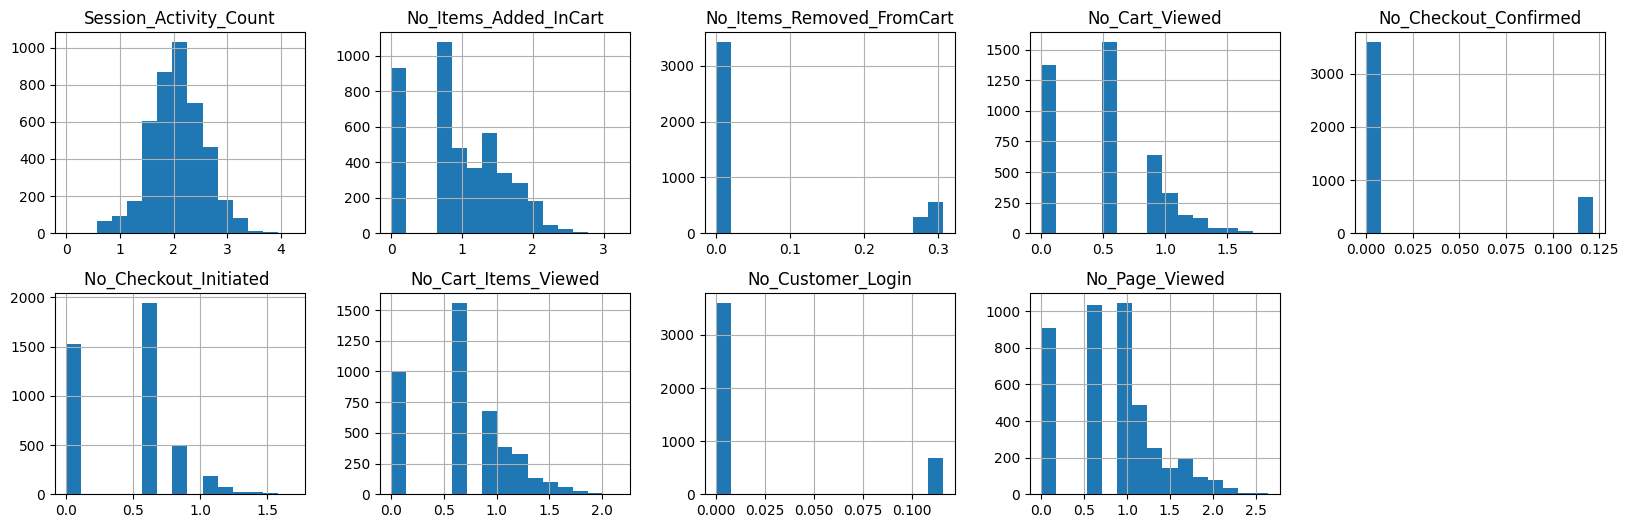

In [30]:
df_num_transformed.hist(bins=15, figsize=(20, 6), layout=(2, 5))

DADO EL COMPORTAMIENTO DE LAS FRECUENCIAS CONSIDERAMOS LOS DATOS TRANSFORMADOS SIN ESCALAR

In [31]:
df_final = pd.concat([df_num_transformed, cat], axis=1)

CONSTRUCCION DEL DATAFRAME PARA LA REPRESENTACION EN POWER BI


In [32]:
df_pb.head()

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
1,Yes,4,1,0,0,0,0,1,0,0,0,1
2,No,38,0,0,2,0,0,2,0,2,0,1
3,No,8,5,0,0,1,1,1,0,0,1,0
4,No,6,0,0,2,0,0,4,0,0,0,1
5,Yes,31,14,12,1,0,0,4,0,0,2,1


In [33]:
df_pb[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]].value_counts()

Is_Product_Details_viewed  Customer_Segment_Type  Cart_Abandoned
No                         0                      1                 1537
                           1                      1                  757
Yes                        0                      1                  590
                           1                      1                  353
No                         0                      0                  258
Yes                        2                      1                  216
No                         2                      1                  215
                           1                      0                  209
                           2                      0                   98
Yes                        1                      0                   26
                           0                      0                   20
                           2                      0                    5
Name: count, dtype: int64

In [34]:
df_pb["Customer_Segment_Type"] = df_pb["Customer_Segment_Type"].replace(
    {0 : "Cliente Objetivo", 
     1 : "Cliente Leal", 
     2 : "Cliente No Segmentado"})

In [35]:
df_pb["Cart_Abandoned"] = df_pb["Cart_Abandoned"].replace(
    {0 : "No", 
     1 : "Si"})

In [36]:
df_pb["Is_Product_Details_viewed"] = df_pb["Is_Product_Details_viewed"].replace(
    {"Yes" : "Si"})

In [37]:
df_pb.sum().isna()

Is_Product_Details_viewed    False
Session_Activity_Count       False
No_Items_Added_InCart        False
No_Items_Removed_FromCart    False
No_Cart_Viewed               False
No_Checkout_Confirmed        False
No_Checkout_Initiated        False
No_Cart_Items_Viewed         False
No_Customer_Login            False
No_Page_Viewed               False
Customer_Segment_Type        False
Cart_Abandoned               False
dtype: bool

In [38]:
def analyze_outliers(df, columns):
    for column in columns:
        print(f"Analizando outliers en la columna: {column}")
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
        print(f"Outliers identificados en la columna {column}:")
        print(outliers)
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot de {column}')
        plt.xlabel(column)
        plt.show()
        

In [39]:
 df_pb.columns

Index(['Is_Product_Details_viewed', 'Session_Activity_Count',
       'No_Items_Added_InCart', 'No_Items_Removed_FromCart', 'No_Cart_Viewed',
       'No_Checkout_Confirmed', 'No_Checkout_Initiated ',
       'No_Cart_Items_Viewed', 'No_Customer_Login', 'No_Page_Viewed',
       'Customer_Segment_Type', 'Cart_Abandoned'],
      dtype='object')

Analizando outliers en la columna: No_Items_Added_InCart
Outliers identificados en la columna No_Items_Added_InCart:
     Is_Product_Details_viewed  Session_Activity_Count  No_Items_Added_InCart   
5                           Si                      31                     14  \
22                          No                      35                     14   
27                          Si                      24                     13   
38                          No                      23                     14   
47                          No                      38                     13   
...                        ...                     ...                    ...   
4223                        No                      52                     12   
4249                        Si                     118                     30   
4254                        Si                      77                     31   
4260                        No                      21                   

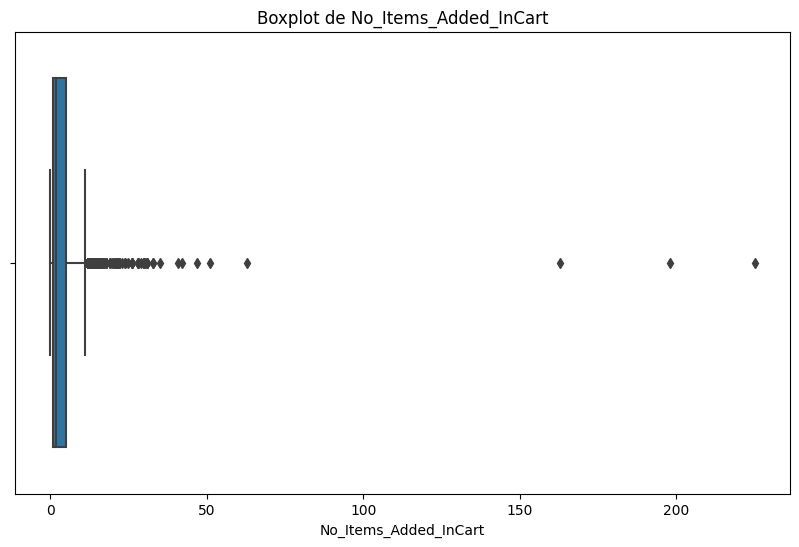

In [43]:
relevant_columns = [
    'No_Items_Added_InCart',
]

analyze_outliers(df_pb, relevant_columns)


In [44]:
def remove_outliers(df, columns):
    df_clean = df.copy()  
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[column] >= lower_limit) & (df_clean[column] <= upper_limit)]
    
    return df_clean

In [45]:
df_clean = remove_outliers(df_pb, relevant_columns)

Analizando outliers en la columna: No_Items_Added_InCart
Outliers identificados en la columna No_Items_Added_InCart:
     Is_Product_Details_viewed  Session_Activity_Count  No_Items_Added_InCart   
23                          No                      18                     11  \
79                          Si                      23                      9   
94                          Si                      32                     11   
128                         No                      21                      9   
130                         Si                      32                     10   
...                        ...                     ...                    ...   
4162                        No                      39                      9   
4171                        No                      25                      9   
4172                        No                      16                     10   
4210                        No                      27                   

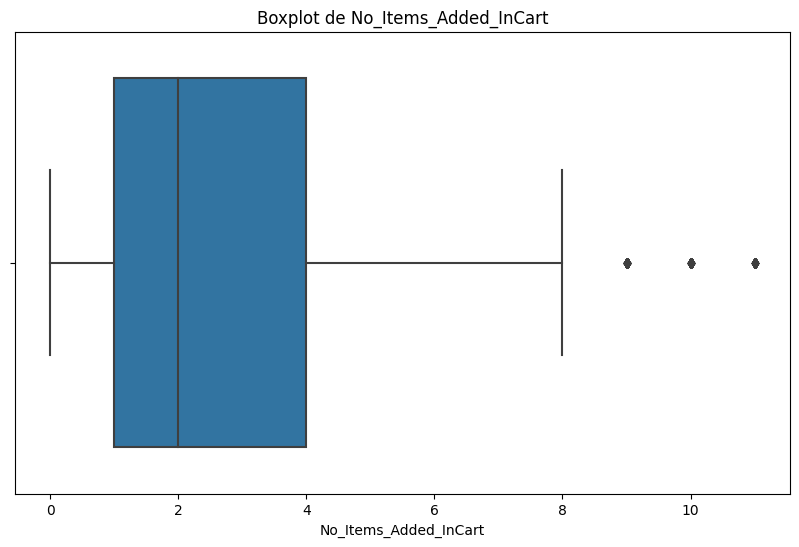

In [46]:
analyze_outliers(df_clean, relevant_columns)

In [47]:
df_clean.No_Checkout_Confirmed.value_counts()

No_Checkout_Confirmed
0     3436
1      581
2       40
3        8
4        5
5        2
8        1
11       1
7        1
6        1
Name: count, dtype: int64

In [48]:
df_pb.No_Checkout_Confirmed.value_counts()

No_Checkout_Confirmed
0     3597
1      624
2       42
3        9
4        5
5        3
8        1
11       1
7        1
6        1
Name: count, dtype: int64

In [105]:
df_pb.No_Items_Removed_FromCart.value_counts()

No_Items_Removed_FromCart
0     3429
1      292
2      165
3       89
4       67
6       45
5       38
7       28
10      23
8       17
11      15
9       15
12      10
13       7
18       6
16       5
21       4
19       3
15       3
25       3
14       3
20       2
28       2
17       2
31       1
35       1
33       1
22       1
50       1
49       1
32       1
42       1
27       1
40       1
43       1
Name: count, dtype: int64

In [49]:
df_pb.No_Checkout_Confirmed[df_pb['No_Items_Removed_FromCart'] > df_pb['No_Items_Added_InCart']].value_counts()

No_Checkout_Confirmed
0    168
1     35
Name: count, dtype: int64

In [50]:
df_clean.No_Checkout_Confirmed[df_clean['No_Items_Removed_FromCart'] > df_clean['No_Items_Added_InCart']].value_counts()

No_Checkout_Confirmed
0    154
1     34
Name: count, dtype: int64

In [51]:
df_clean.No_Checkout_Confirmed.value_counts()

No_Checkout_Confirmed
0     3436
1      581
2       40
3        8
4        5
5        2
8        1
11       1
7        1
6        1
Name: count, dtype: int64

In [56]:
df_clean.No_Items_Removed_FromCart.value_counts()

No_Items_Removed_FromCart
0     3325
1      281
2      156
3       78
4       60
6       42
5       29
7       22
10      19
8       15
9       12
11       8
16       4
25       3
21       3
12       2
13       2
14       2
18       2
33       1
32       1
31       1
40       1
35       1
28       1
22       1
50       1
49       1
17       1
19       1
Name: count, dtype: int64

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 1 to 4284
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Is_Product_Details_viewed  4076 non-null   object
 1   Session_Activity_Count     4076 non-null   int64 
 2   No_Items_Added_InCart      4076 non-null   int64 
 3   No_Items_Removed_FromCart  4076 non-null   int64 
 4   No_Cart_Viewed             4076 non-null   int64 
 5   No_Checkout_Confirmed      4076 non-null   int64 
 6   No_Checkout_Initiated      4076 non-null   int64 
 7   No_Cart_Items_Viewed       4076 non-null   int64 
 8   No_Customer_Login          4076 non-null   int64 
 9   No_Page_Viewed             4076 non-null   int64 
 10  Customer_Segment_Type      4076 non-null   object
 11  Cart_Abandoned             4076 non-null   object
dtypes: int64(9), object(3)
memory usage: 414.0+ KB


In [58]:
nuevos_nombres = [
    "Producto_Detalles_Vistos",
    "Cantidad_Actividades_Sesión",
    "Cantidad_Artículos_En_Carro",
    "Cantidad_Artículos_Eliminados_Carro",
    "Cantidad_Visitas_Carro",
    "Confirmaciones_Compra",
    "Inicios_Pago",
    "Vistas_Productos_Carro",
    "Inicios_Sesión_Cliente",
    "Vistas_Páginas",
    "Segmento_Cliente",
    "Abandono_Carro"
]
df_clean.columns = nuevos_nombres

print(df_clean.head())

  Producto_Detalles_Vistos  Cantidad_Actividades_Sesión   
1                       Si                            4  \
2                       No                           38   
3                       No                            8   
4                       No                            6   
6                       Si                           13   

   Cantidad_Artículos_En_Carro  Cantidad_Artículos_Eliminados_Carro   
1                            1                                    0  \
2                            0                                    0   
3                            5                                    0   
4                            0                                    0   
6                            6                                    0   

   Cantidad_Visitas_Carro  Confirmaciones_Compra  Inicios_Pago   
1                       0                      0             0  \
2                       2                      0             0   
3                   

In [59]:
ruta_archivo_csv = "../data/data_power_bi.csv"

df_clean.to_csv(ruta_archivo_csv, index=False)

CONSTRUCCION DEL DATAFRAME PARA EL ENTRENAMIENTO DE MODELOS



In [81]:
df_ml = df_final.copy()

In [82]:
df_ml[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]].value_counts()

Is_Product_Details_viewed  Customer_Segment_Type  Cart_Abandoned
No                         0                      1                 1537
                           1                      1                  757
Yes                        0                      1                  590
                           1                      1                  353
No                         0                      0                  258
Yes                        2                      1                  216
No                         2                      1                  215
                           1                      0                  209
                           2                      0                   98
Yes                        1                      0                   26
                           0                      0                   20
                           2                      0                    5
Name: count, dtype: int64

In [83]:
df_ml["Is_Product_Details_viewed"] = df_ml["Is_Product_Details_viewed"].replace({"No" : 0, "Yes" : 1})
df_ml["Is_Product_Details_viewed"].value_counts()

Is_Product_Details_viewed
0    3074
1    1210
Name: count, dtype: int64

In [84]:
#ruta_archivo_csv2 = "../data/data_machine_learning.csv"

#df_ml.to_csv(ruta_archivo_csv2, index=False)